# Problem Statement

The Olympic Games, considered to be the world's foremost sports competition has more than 200 nations participating across the Summer and Winter Games alternating by occurring every four years but two years apart.

Throughout this project, we will explore the Olympics dataset(scraped from https://en.wikipedia.org/wiki/All-time_Olympic_Games_medal_table) , look at some interesting statistics and then try to find out which country is the King of Olympic Games.

# About the dataset

The dataset has details of 146 countries with following 16 features :-

# Why solve this project?

After completing this project, you will have a better understanding of data handling with python(pandas). In this project, you will be applying the following concepts :

1) Dataframe operations
2) Conditional statement and loops
3) List operations
4) Bar Plotting
5) Mathematical operations

# Data Loading

Let's start with the simple task of loading the data and do a little bit of renaming.

In [3]:
#Importing header files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Reading the file
data=pd.read_csv("./Olympic_Hero.csv")

In [4]:
#Printing the first five columns
print(data.head(5))

  Country_Name  # Summer  Gold_Summer  Silver_Summer  Bronze_Summer  \
0  Afghanistan        13            0              0              2   
1      Algeria        12            5              2              8   
2    Argentina        23           18             24             28   
3      Armenia         5            1              2              9   
4  Australasia         2            3              4              5   

   Total_Summer  # Winter  Gold_Winter  Silver_Winter  Bronze_Winter  \
0             2         0            0              0              0   
1            15         3            0              0              0   
2            70        18            0              0              0   
3            12         6            0              0              0   
4            12         0            0              0              0   

   Total_Winter  # Games  Gold_Total  Silver_Total  Bronze_Total  Total  
0             0       13           0             0             2  

In [6]:
#Renaming a column
data.rename(columns={'Total':'Total_Medals'},inplace=True)

In [7]:
#Printing the first five columns
print(data.head(5))

  Country_Name  # Summer  Gold_Summer  Silver_Summer  Bronze_Summer  \
0  Afghanistan        13            0              0              2   
1      Algeria        12            5              2              8   
2    Argentina        23           18             24             28   
3      Armenia         5            1              2              9   
4  Australasia         2            3              4              5   

   Total_Summer  # Winter  Gold_Winter  Silver_Winter  Bronze_Winter  \
0             2         0            0              0              0   
1            15         3            0              0              0   
2            70        18            0              0              0   
3            12         6            0              0              0   
4            12         0            0              0              0   

   Total_Winter  # Games  Gold_Total  Silver_Total  Bronze_Total  Total_Medals  
0             0       13           0             0         

# Summer or Winter

Some Countries love Summer, some Winter. We think it has to do something with their Olympic performance.

For this task we will try to figure out which olympic event does a country perform better in.

In [9]:
#Creating new column 'Better_Event'
data['Better_Event'] = np.where(data['Total_Summer'] > data['Total_Winter'] , 'Summer', 'Winter')
data['Better_Event'] = np.where(data['Total_Summer'] == data['Total_Winter'] , 'Both', data['Better_Event'])

#Printing the first five columns
print(data.head(5))

  Country_Name  # Summer  Gold_Summer  Silver_Summer  Bronze_Summer  \
0  Afghanistan        13            0              0              2   
1      Algeria        12            5              2              8   
2    Argentina        23           18             24             28   
3      Armenia         5            1              2              9   
4  Australasia         2            3              4              5   

   Total_Summer  # Winter  Gold_Winter  Silver_Winter  Bronze_Winter  \
0             2         0            0              0              0   
1            15         3            0              0              0   
2            70        18            0              0              0   
3            12         6            0              0              0   
4            12         0            0              0              0   

   Total_Winter  # Games  Gold_Total  Silver_Total  Bronze_Total  \
0             0       13           0             0             2   
1   

In [10]:
#Finding the value with max count in 'Better_Event' column
better_event=data['Better_Event'].value_counts().index.values[0]

#Printing the better event
print('Better_Event=', better_event) 

Better_Event= Summer


# Top 10

So we figured out which is a better event for each country. Let's move on to finding out the best performing countries across all events

In this task we will try to find :-

1) Which are the top 10 performing teams at summer event (with respect to total medals), winter event and overall?

2) How many teams are present in all of the three lists above?

In [14]:
#Subsetting the dataframe
top_countries=data[['Country_Name','Total_Summer', 'Total_Winter','Total_Medals']]

In [16]:
print(top_countries)

                         Country_Name  Total_Summer  Total_Winter  \
0                         Afghanistan             2             0   
1                             Algeria            15             0   
2                           Argentina            70             0   
3                             Armenia            12             0   
4                         Australasia            12             0   
..                                ...           ...           ...   
142  Independent Olympic Participants             3             0   
143                            Zambia             2             0   
144                          Zimbabwe             8             0   
145                        Mixed team            17             0   
146                            Totals         14714          2865   

     Total_Medals  
0               2  
1              15  
2              70  
3              12  
4              12  
..            ...  
142             3  
143        

In [19]:
#Dropping the last row (The last row contains the sum of the medals)
top_countries=top_countries[:-1]

print(top_countries)

                         Country_Name  Total_Summer  Total_Winter  \
0                         Afghanistan             2             0   
1                             Algeria            15             0   
2                           Argentina            70             0   
3                             Armenia            12             0   
4                         Australasia            12             0   
..                                ...           ...           ...   
139                           Vietnam             2             0   
140                    Virgin Islands             1             0   
141                        Yugoslavia            83             4   
142  Independent Olympic Participants             3             0   
143                            Zambia             2             0   

     Total_Medals  
0               2  
1              15  
2              70  
3              12  
4              12  
..            ...  
139             2  
140        

In [21]:
#Function for top 10
def top_ten(data, col):
    
    #Creating a new list
    country_list=[]
    
    #Finding the top 10 values of 'col' column
    country_list= list((data.nlargest(10,col)['Country_Name']))
    
    #Returning the top 10 list
    return country_list



#Calling the function for Top 10 in Summer
top_10_summer=top_ten(top_countries,'Total_Summer')
print("Top 10 in Summer:\n",top_10_summer, "\n")

#Calling the function for Top 10 in Winter
top_10_winter=top_ten(top_countries,'Total_Winter')
print("Top 10 in Winter:\n",top_10_winter, "\n")

#Calling the function for Top 10 in both the events
top_10=top_ten(top_countries,'Total_Medals')
print("Top 10:\n",top_10, "\n")

#Extracting common country names from all three lists
common=list(set(top_10_summer) & set(top_10_winter) & set(top_10))

print('Common Countries :\n', common, "\n")

Top 10 in Summer:
 ['United States', 'Soviet Union', 'Great Britain', 'France', 'Germany', 'Italy', 'Sweden', 'Hungary', 'China', 'Australia'] 

Top 10 in Winter:
 ['Norway', 'United States', 'Austria', 'Germany', 'Soviet Union', 'Canada', 'Finland', 'Sweden', 'Switzerland', 'Russia'] 

Top 10:
 ['United States', 'Soviet Union', 'Great Britain', 'Germany', 'France', 'Italy', 'Sweden', 'China', 'East Germany', 'Russia'] 

Common Countries :
 ['Soviet Union', 'United States', 'Sweden', 'Germany'] 



# Plotting Top 10

From the lists that we have created from the previous task, let's plot the medal count of the top 10 countries for better visualisation

Text(0, 0.5, 'Total Medals')

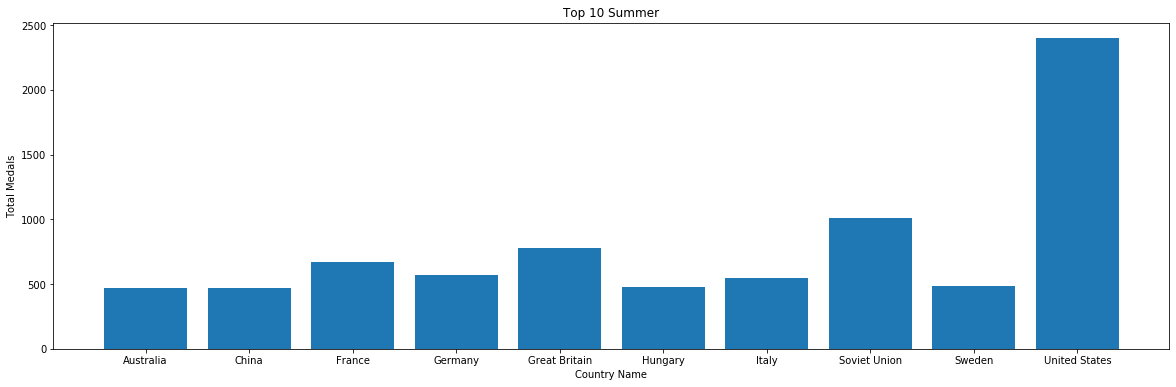

In [22]:
#For Summer

#Creating the dataframe for Summer event
summer_df= data[data['Country_Name'].isin(top_10_summer)]

#Plotting the bar graph
plt.figure(figsize=(20, 6))
plt.bar(summer_df['Country_Name'], summer_df['Total_Summer'])

#Changing the graph title
plt.title('Top 10 Summer')

#Changing the x-axis label
plt.xlabel('Country Name')

#Changing the y-axis label
plt.ylabel('Total Medals')

Text(0, 0.5, 'Total Medals')

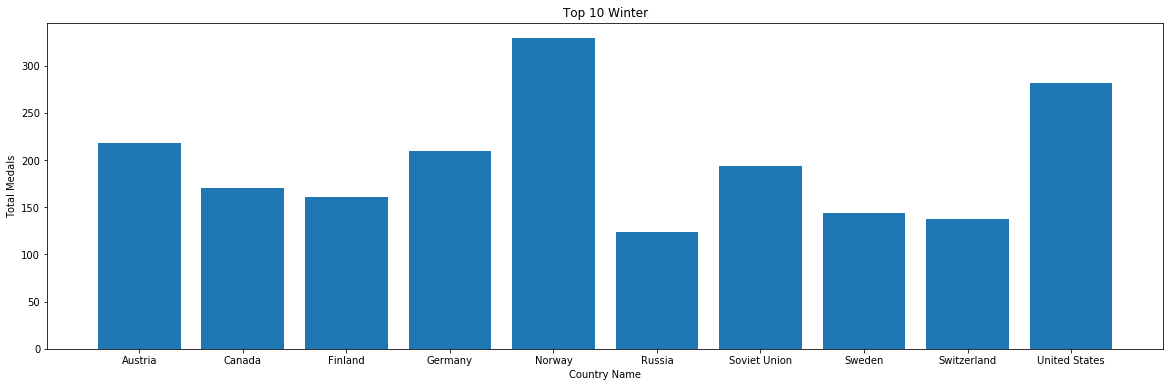

In [23]:
#For Winter

#Creating the dataframe for Winter event
winter_df=data[data['Country_Name'].isin(top_10_winter)]

#Plotting the bar graph
plt.figure(figsize=(20, 6))
plt.bar(winter_df['Country_Name'], winter_df['Total_Winter'])

#Changing the graph title
plt.title('Top 10 Winter')

#Changing the x-axis label
plt.xlabel('Country Name')

#Changing the y-axis label
plt.ylabel('Total Medals')

Text(0, 0.5, 'Total Medals')

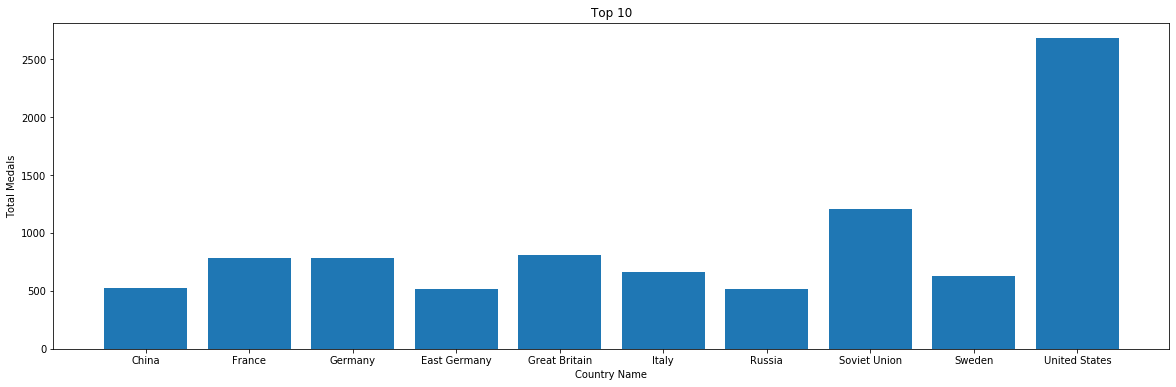

In [24]:
#For both the events

#Creating the dataframe for both the events
top_df=data[data['Country_Name'].isin(top_10)]

#Plotting the bar graph
plt.figure(figsize=(20, 6))
plt.bar(top_df['Country_Name'], top_df['Total_Medals'])

#Changing the graph title
plt.title('Top 10')

#Changing the x-axis label
plt.xlabel('Country Name')

#Changing the y-axis label
plt.ylabel('Total Medals')

# Top performing country(Gold)

Winning silver or bronze medals is a big achievement but winning gold is bigger.

Using the above created dataframe subsets, in this task let's find out which country has had the best performance with respect to the ratio between gold medals won and total medals won.

In [25]:
#For Summer List

#Creating new column 'Golden_Ratio'
summer_df['Golden_Ratio']=summer_df['Gold_Summer']/summer_df['Total_Summer']

#Finding the max value of 'Golden_Ratio' column
summer_max_ratio=max(summer_df['Golden_Ratio'])

#Finding the country assosciated with the max value of 'Golden_Ratio' column
summer_country_gold=summer_df.loc[summer_df['Golden_Ratio'].idxmax(),'Country_Name']

print("Top Summer Country:", summer_country_gold, " with a ratio of %.2f" %summer_max_ratio )

Top Summer Country: China  with a ratio of 0.42


C:\Users\sagar\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [26]:
#For Winter List

#Creating new column 'Golden_Ratio'
winter_df['Golden_Ratio']=winter_df['Gold_Winter']/winter_df['Total_Winter']

#Finding the max value of 'Golden_Ratio' column
winter_max_ratio=max(winter_df['Golden_Ratio'])

#Finding the country assosciated with the max value of 'Golden_Ratio' column
winter_country_gold=winter_df.loc[winter_df['Golden_Ratio'].idxmax(),'Country_Name']

print("Top Winter Country:", winter_country_gold, " with a ratio of %.2f" %winter_max_ratio )

Top Winter Country: Soviet Union  with a ratio of 0.40


C:\Users\sagar\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [27]:
#For Overall List

#Creating new column 'Golden_Ratio'
top_df['Golden_Ratio']=top_df['Gold_Total']/top_df['Total_Medals']

#Finding the max value of 'Golden_Ratio' column
top_max_ratio=max(top_df['Golden_Ratio'])

#Finding the country assosciated with the max value of 'Golden_Ratio' column
top_country_gold=top_df.loc[top_df['Golden_Ratio'].idxmax(),'Country_Name']

print("Top Country:", top_country_gold, " with a ratio of %.2f" %top_max_ratio )

Top Country: China  with a ratio of 0.40


C:\Users\sagar\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


# Best in the world

Winning Gold is great but is winning most gold equivalent to being the best overall perfomer? Let's find out.

In [28]:
#Removing the last column of the dataframe (The last row contains the total of all the values calculated vertically)
data_1=data[:-1]

#Creating a new column 'Total_Points'
data_1['Total_Points']= data_1['Gold_Total']*3 + data_1['Silver_Total']*2 + data_1['Bronze_Total']*1  # Use of position index to handle the ambiguity of having same name columns

C:\Users\sagar\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [29]:
print(data_1)

                         Country_Name  # Summer  Gold_Summer  Silver_Summer  \
0                         Afghanistan        13            0              0   
1                             Algeria        12            5              2   
2                           Argentina        23           18             24   
3                             Armenia         5            1              2   
4                         Australasia         2            3              4   
..                                ...       ...          ...            ...   
141                        Yugoslavia        16           26             29   
142  Independent Olympic Participants         1            0              1   
143                            Zambia        12            0              1   
144                          Zimbabwe        12            3              4   
145                        Mixed team         3            8              5   

     Bronze_Summer  Total_Summer  # Winter  Gold_Wi

In [34]:
#Finding the maximum value of 'Total_Points' column
most_points=max(data_1['Total_Points'])

#Finding the country assosciated with the max value of 'Total_Column' column
best_country=data_1.loc[data_1['Total_Points'].idxmax(),'Country_Name']

print('The maximum points achieved is', most_points, 'by', best_country )

The maximum points achieved is 5684 by United States


# Plot for the best

We know which country is best when it comes to winning the most points in Olympic Games. 

Let's plot the medal count to visualise their success better.

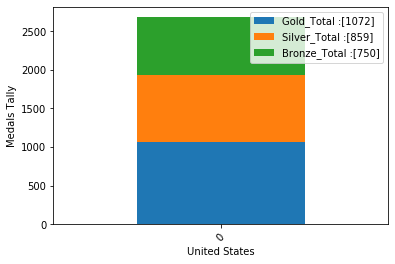

In [45]:
#Subsetting the dataframe
best=data[data['Country_Name']==best_country]
best.reset_index(drop = True, inplace = True)
best=best[['Gold_Total','Silver_Total','Bronze_Total']]


#Plotting bar plot
best.plot.bar(stacked=True)

#Changing the x-axis label
plt.xlabel('United States')

#Changing the y-axis label
plt.ylabel('Medals Tally')

#Rotating the ticks of X-axis
plt.xticks(rotation=45)

#Updating the graph legend
l=plt.legend()
l.get_texts()[0].set_text('Gold_Total :' + str(best['Gold_Total'].values))
l.get_texts()[1].set_text('Silver_Total :' + str(best['Silver_Total'].values))
l.get_texts()[2].set_text('Bronze_Total :' + str(best['Bronze_Total'].values))